## Задача 4.1
Рассмотрим данные из [табллицы](data/corona.csv) по числу заболевших и выздоровевших от короновируса
в разных странах. Требуется проверить гипотезу о тому, что число выздоровевших
людей в странах не зависит от числа заболевших в стране. 

**Требуется:**
1. записать задачу формально;
2. предложить статистику для решения данной задачи;
3. записать приближенно нулевое распределение данной статистики;
4. записать явно правило принятия решения на основе статистики и нулевого распределения для обеспечения уровня значимости alpha = 0.05;
5. проверить гипотезу по записанному критерию, для данных из условия. Противоречат ли они гипотезу?
6. на уровне значимости alpha = 0.05 найти зависимость мощности критерия в зависимости от истинного значения статистики.

Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для подстановвки численых значений в финальную формулу)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/corona.csv")
df

,Страна,заболевшие,выздоровевшие
0,германия,2078,25
1,дания,617,1
2,малайзия,149,26
3,австрия,302,4
4,ирак,71,15
5,китай,80932,62901
6,италия,12462,1045
7,сша,1663,12
8,сингапур,178,96
9,австралия,128,21


In [6]:
X = df.drop('Страна', axis=1)

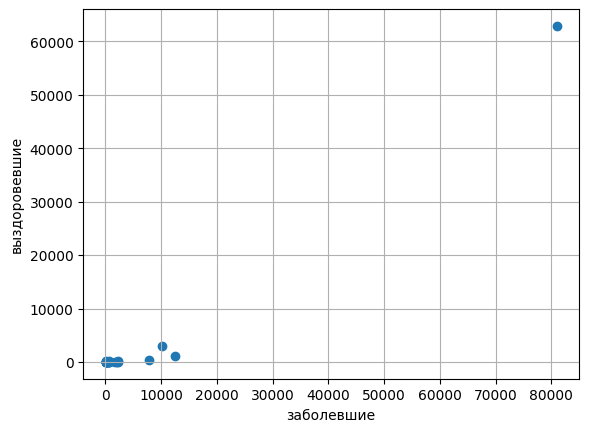

In [2]:
plt.scatter(df['заболевшие'], df['выздоровевшие'])
plt.xlabel('заболевшие')
plt.ylabel('выздоровевшие')
plt.grid()
plt.show()

Плохо видно, посмотрим в логарифмических осях

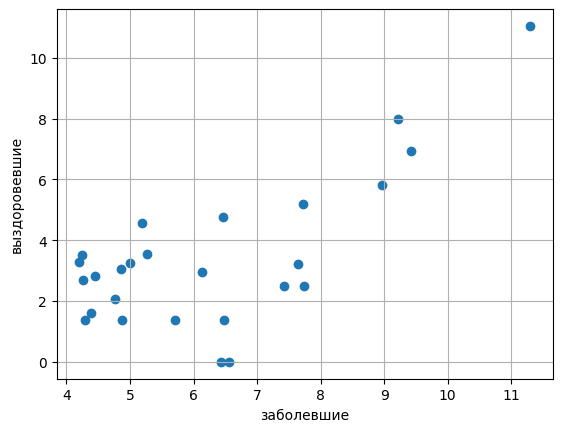

In [9]:
plt.scatter(np.log(df['заболевшие']), np.log(df['выздоровевшие']))
plt.xlabel('заболевшие', fontsize=10)
plt.ylabel('выздоровевшие', fontsize=10)
plt.grid()
plt.show()

Так-то лучше. Видно, что некоторая корреляция всё-таки есть

Будем использовать критерий основанный на корреляции Кендалла.

$$H_0:\ \ \tau_{X_1X_2} = 0 (выборки\ не\ коррелируют)$$

$$H_1: \ \ \tau_{X_1X_2} >< 0$$

Статистика: $$T(X_1^n, X_2^n) = \hat{\tau}_{X_1X_2} = 1 - \frac{4}{n(n-1)} \sum\limits_{i=1}^{n-1} \sum\limits_{j=1}^n [[X_{1i} < X_{1j}] \neq [X_{2i} < X_{2j}]]$$

Нулевое распределение аппроксимируется нормальным и:

$$\mathbb{E}\hat{\tau}_{X_1X_2} = 0$$
$$\mathbb{D}\hat{\tau}_{X_1X_2} = \frac{2(n+5)}{9n(n-1)}$$


Посчитаем статистику

In [15]:
d = 0
n = len(df)
for i in range(n-1):
    for j in range(i+1, n):
        if (df['заболевшие'][i] < df['заболевшие'][j]) != (df['выздоровевшие'][i] < df['выздоровевшие'][j]):
            d += 1
tau = 1 - 4 / n / (n-1) * d
tau

0.27384615384615385

Чтобы нам сравнить статистику с квантилем нормального распределения, нужно поделить на корень из дисперсии нулевого распределения

In [16]:
var = np.sqrt((2 * (n + 5))/(9*n*(n-1)))
var

0.10294799948658837

In [17]:
tau_norm =  tau / var
tau_norm

2.6600434706050735

Правило принятия решения: Нулевая гипотеза отвергается, если $\frac{\tau}{\sqrt{\frac{2(n+5)}{9n(n-1)}}} \geq \Phi_{1-\alpha/2}$. 

Смотрим 0.975 квантиль нормального распределения - 1.96

2.66 > 1.96, значит нулевая гипотеза отвергается и корреляция есть